In [1]:
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

import pycaret

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

   Survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


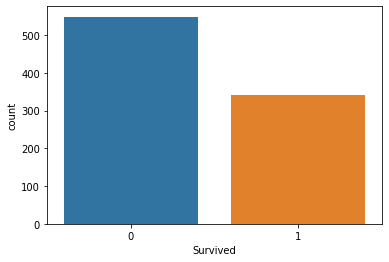

In [7]:
cat_summary(train, "Survived", plot=True)

In [8]:
from pycaret.classification import *

In [9]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True,
             log_experiment = True, 
             experiment_name = 'titanic'
             )

,Description,Value
0,session_id,1734
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7945,0.8369,0.6571,0.7749,0.7089,0.5516,0.5581,0.0550
lightgbm,Light Gradient Boosting Machine,0.7866,0.8381,0.6826,0.7375,0.7067,0.5397,0.5427,0.1790
lda,Linear Discriminant Analysis,0.7848,0.8321,0.6654,0.7444,0.7010,0.5338,0.5373,0.0160
ridge,Ridge Classifier,0.7832,0.0000,0.6611,0.7438,0.6979,0.5298,0.5338,0.2980
lr,Logistic Regression,0.7816,0.8342,0.6697,0.7363,0.6998,0.5289,0.5317,0.7360
rf,Random Forest Classifier,0.7737,0.8225,0.6784,0.7159,0.6924,0.5143,0.5185,0.1800
ada,Ada Boost Classifier,0.7688,0.8155,0.6904,0.7012,0.6942,0.5085,0.5100,0.0580
et,Extra Trees Classifier,0.7578,0.7980,0.6531,0.6967,0.6691,0.4793,0.4841,0.1250
dt,Decision Tree Classifier,0.7512,0.7272,0.6611,0.6770,0.6661,0.4684,0.4708,0.1500
svm,SVM - Linear Kernel,0.6614,0.0000,0.3212,0.3075,0.2994,0.1866,0.1907,0.1510


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1734, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [11]:
g_boost  = create_model('gbc') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.7959,0.6667,0.6957,0.6809,0.4911,0.4914
1,0.8095,0.8718,0.6667,0.8000,0.7273,0.5828,0.5885
2,0.8413,0.8910,0.6250,0.9375,0.7500,0.6404,0.6687
3,0.8226,0.8696,0.6522,0.8333,0.7317,0.6021,0.6122
4,0.7742,0.8161,0.6522,0.7143,0.6818,0.5074,0.5086
5,0.8226,0.8724,0.7391,0.7727,0.7556,0.6164,0.6168
6,0.8226,0.8562,0.6522,0.8333,0.7317,0.6021,0.6122
7,0.8065,0.7867,0.6667,0.8000,0.7273,0.5792,0.5850
8,0.7258,0.7648,0.5833,0.6667,0.6222,0.4085,0.4108
9,0.7581,0.8448,0.6667,0.6957,0.6809,0.4862,0.4865


In [12]:
tuned_gb = tune_model(g_boost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7302,0.7837,0.6250,0.6522,0.6383,0.4233,0.4235
1,0.7937,0.8611,0.6667,0.7619,0.7111,0.5517,0.5547
2,0.7937,0.8622,0.6250,0.7895,0.6977,0.5442,0.5528
3,0.7903,0.8534,0.6957,0.7273,0.7111,0.5467,0.5470
4,0.7419,0.8032,0.5652,0.6842,0.6190,0.4266,0.4310
5,0.7903,0.8880,0.7826,0.6923,0.7347,0.5624,0.5653
6,0.8226,0.8161,0.6522,0.8333,0.7317,0.6021,0.6122
7,0.8065,0.7840,0.7500,0.7500,0.7500,0.5921,0.5921
8,0.7419,0.8032,0.6250,0.6818,0.6522,0.4477,0.4487
9,0.7742,0.8098,0.7500,0.6923,0.7200,0.5313,0.5325


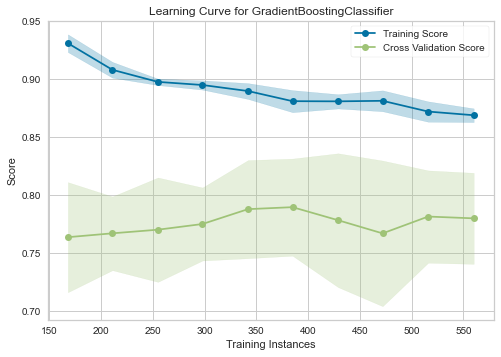

In [13]:
plot_model(estimator = tuned_gb, plot = 'learning')

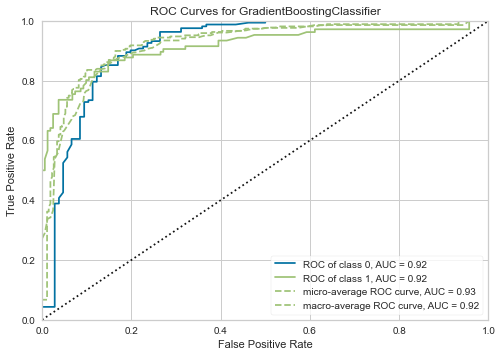

In [14]:
plot_model(estimator = tuned_gb, plot = 'auc')

In [15]:
evaluate_model(tuned_gb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
predictions=predict_model(tuned_gb,train)
predictions

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.8940
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.9792
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.5073
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.9557
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.7775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0.9050
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0.9732
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0.8962
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0.6888


In [17]:
test_predictions=predict_model(tuned_gb,test)
test_predictions

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.9356
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.8675
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.9386
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8773
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.6543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.8278
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9727
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.9346
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.8278


In [29]:
save_model(g_boost , 'deployment_28042021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Sex', 'Embarked'],
                                       display_types=False,
                                       features_todrop=['Name', 'Ticket',
                                                        'Cabin'],
                                       id_columns=['PassengerId'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_c...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                    

In [31]:
deployment_28042021 = load_model('deployment_28042021')

Transformation Pipeline and Model Successfully Loaded


In [20]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Sex', 'Embarked'],
                                      display_types=False,
                                      features_todrop=['Name', 'Ticket',
                                                       'Cabin'],
                                      id_columns=['PassengerId'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Survived',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_c...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                    

In [ ]:
!mlflow ui